# I. The data

Ce dataset presente une liste d'ingredients et de valeurs nutritionnelles de plus de 300k produits de plus de 150 pays du monde entier. C'est un dataset publique qui a pour but de renseigner les utilisateurs dans leur choix de nourriture en général. Il contient plus de 300k observations et 163 colonnes (différentes variables). 
Cependant, comme nous pourrons le voir, il manque beaucoup de données et certaines valeurs sont vraisemblablement incorrectes.

Les différentes colonnes à notre disposition :

* colonnes qui finissent par _t = date en timestamps UNIX format (le nombre de secondes écoulées depuis le 1er janvier 1970)
* colonnes qui finissent par _datetime = date au format yyyy-mm-dd
* colonnes qui finissent par _tags = colonnes de tags (catégorie)
* colonnes qui finissent par _100g = la proportion de nutriment (en g ou kJ pour l'energie) pour 100g ou 100ml de produit
* nutrition-score-fr_100g = Score de nutrition expérimentale qui dérive du UK FSA score et adapté au marché français. (Type de donnée numérique, variant de -15 à 40. Moins cette valeur est élevée, mieux c'est)
* nutrition_grade_fr_100g = colonne indiquant le score en grade (A,B,C,D et E). Cette colonne contient principalement des NaNs.


# II. Imports, modules, configuration 

## II.1 Configs

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys


sys.path.insert(0, "/home/apprenant/Documents/simplon_dev/pyhon_sql/Foodflix3")

#We can now use this folder and import our modules

from src.utils.functions import msv1

# Pandas configurations 
sns.set()
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

## II.2 Dataset import

In [31]:
# Reading the tsv files, printing the shape to see its dimensions and display the first five rows
"""
    The original dataset contains more than 360k rows.
    The source dataset : https://www.kaggle.com/openfoodfacts/world-food-facts
    For this analysis, I created a dataset sample from the original tsv file. Sample of 10k rows
    Code:
    df = pd.read_csv('foodflix_data.tsv', sep='\t') # This is the original dataset
    # The sample method randomly choose rows from a dataframe.  
    df = df.sample(10000)
    df.to_csv('foodflix_10000.tsv', sep='\t')
"""


df = pd.read_csv('../Data/raw_data/foodflix.tsv', sep='\t', low_memory=False)

# III. Data Exploration

## III.1 Dataset properties

In [32]:
print('There are {:,} rows and {} columns in our dataset'.format(df.shape[0], df.shape[1]))

There are 356,027 rows and 163 columns in our dataset


In [33]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, cor

We can see that most of our data are numerical values


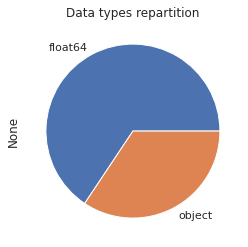

In [34]:
# Just as informations about our data types
sns.set_theme(style="whitegrid")
plt.title('Data types repartition')
df.dtypes.value_counts().plot.pie()
print('We can see that most of our data are numerical values')

## III.2 Dataset columns analysis

In [35]:
# We print all our columns
print(df.columns)

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


We have 107 columns that contain numerical values and 56 columns that contain categorial values.

In [37]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.000,283867.000,283867.000,0.000,283867.000,0.000,0.000,295367.000,869.000,279497.000,263823.000,0.000,0.000,1.000,2.000,4.000,1.000,1.000,1.000,27.000,26.000,0.000,0.000,1.000,0.000,23040.000,23075.000,938.000,201.000,43.000,89.000,207.000,159.000,9.000,27.000,26.000,25.000,15.000,0.000,16.000,0.000,0.000,0.000,143443.000,144170.000,279220.000,279186.000,85.000,32.000,44.000,278.000,6.000,11.000,291.000,451.000,220683.000,294161.000,29.000,17.000,9.000,289739.000,289694.000,4577.000,137706.000,35.000,7207.000,1472.000,930.000,141060.000,11277.000,10925.000,11831.000,6897.000,5330.000,3046.000,5390.000,331.000,2551.000,73.000,99.000,24848.000,198.000,141517.000,5938.000,140660.000,6392.000,3964.000,2122.000,1639.000,99.000,1181.000,23.000,20.000,288.000,91.000,33.000,52.000,3228.000,404.000,182.000,1383.000,0.000,278.000,254856.000,254856.000,0.000,0.000
mean,NaN,1.877,0.023,NaN,0.060,NaN,NaN,1125.453,587.217,56065.872,5.092,NaN,NaN,7.400,6.040,36.136,18.900,8.100,3.000,10.384,10.265,NaN,NaN,61.000,NaN,10.501,6.373,3.476,2.200,2.806,1.582,18.734,12.463,0.051,0.158,0.063,41.243,26.053,NaN,0.000,NaN,NaN,NaN,0.073,0.020,56140.202,15.673,12.822,2.864,24.836,6.007,17.100,12.164,30.943,49.099,384346.734,53265.980,4.399,2.400,0.022,1.941,0.764,8.278,0.000,0.504,0.000,0.054,0.034,0.023,0.332,0.256,0.020,0.047,0.007,0.206,0.000,0.000,0.069,0.433,0.132,0.424,0.080,0.127,0.613,0.004,0.531,0.008,0.026,0.003,0.010,0.003,0.001,0.000,0.000,2.076,12.262,6.476,33.393,60.360,15.363,52.103,NaN,335.791,9.166,8.981,NaN,NaN
std,NaN,2.501,0.153,NaN,0.281,NaN,NaN,936.826,713.256,29633845.276,7.965,NaN,NaN,NaN,0.226,24.101,NaN,NaN,NaN,3.940,3.388,NaN,NaN,NaN,NaN,16.789,10.931,8.665,7.778,13.114,1.981,32.590,110.916,0.029,0.030,0.011,25.061,25.546,NaN,0.000,NaN,NaN,NaN,1.539,0.358,29648540.715,21.984,15.164,5.881,29.314,13.986,17.807,8.372,24.834,33.116,180552853.312,28885775.920,3.028,2.162,0.003,120.546,47.463,10.968,0.073,2.525,0.000,0.663,1.025,2.235,2.620,1.271,0.338,1.665,0.332,5.129,0.019,0.001,1.456,1.381,0.214,12.504,0.133,3.349,11.964,0.217,13.360,0

Using .describe() on our dataset can quickly show us if they are incorrect values for max and min of certains columns.

In [38]:
# We analyse the missing datas
df.isnull().sum().sort_values()

last_modified_t                0
last_modified_datetime         0
creator                        3
created_t                      3
created_datetime              10
                           ...  
-melissic-acid_100g       356027
-cerotic-acid_100g        356027
-lignoceric-acid_100g     356027
no_nutriments             356027
water-hardness_100g       356027
Length: 163, dtype: int64

We noticed they are a lot of missing values, and some columns are totally empty (100% missing values)

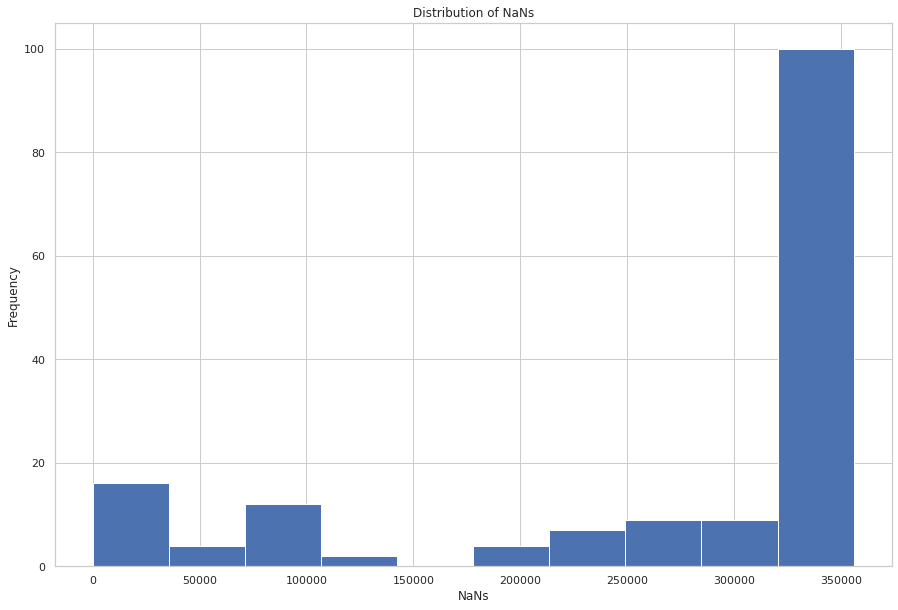

In [39]:
#Distribution of NaNs values
df.isnull().sum().plot(kind='hist', figsize=(15,10))
plt.title('Distribution of NaNs')
plt.xlabel('NaNs')
plt.show()

Text(0.5, 0, 'percentage')

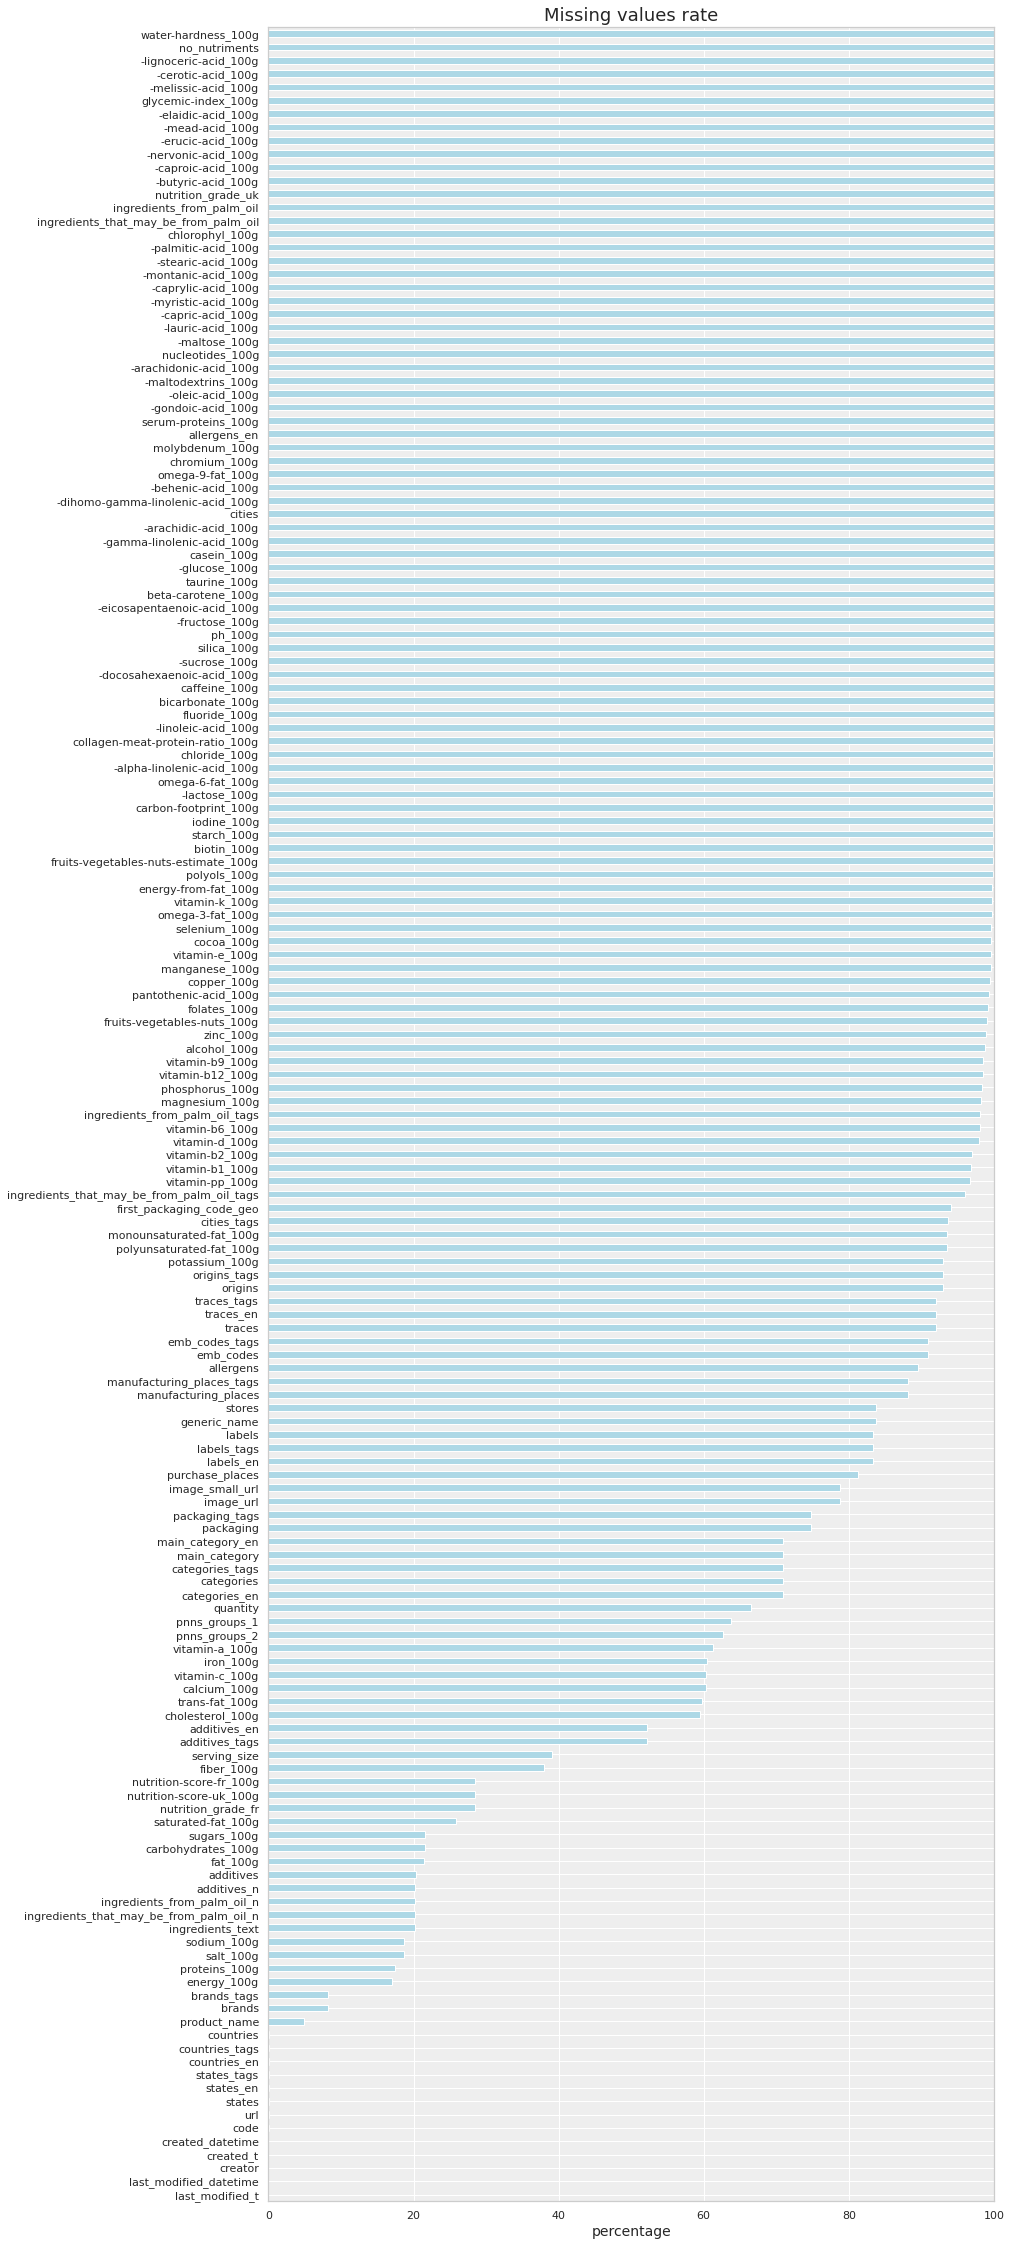

In [40]:
# Visualization of the  missing value per columns
plt.figure(figsize=(13, 40))
plt.rcParams['axes.facecolor'] = '#eee'
plt.rc('grid', color='#fff')
(df.isnull().mean(axis=0)*100).sort_values().plot.barh(color ="Lightblue")
plt.xlim(xmax=100)
plt.title("Missing values rate",fontsize=18)
plt.xlabel("percentage",fontsize=14)

### Conclusion of this first exploratory step 

* This dataset is a subset of the dataset we can find on Kaggle. It contains 100k rows that represent a food item and 164 columns (variables, what define each item).

* For most of our features, they represent a nutrient value like fat, carbohydrates, proteins etc along with some textual values like the product name, geographical details, allergens, ingredients etc.

* At first glance, we can see that they are a lot of missing values for our nutriscore analysis. In fact, a lot of the row that end with _100g are empty and we need them to calculate the nutriscore. We will see how we will handle these missing values.